In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the provided file
file_path = 'Customerattributiondata.csv'
data = pd.read_csv(file_path, delimiter='\t')

# Display the first few rows of the dataset to understand its structure
data.head()

,CUSTOMERID,SESSIONID,TIMESTAMP_TOUCHPOINT,MARKETINGCHANNEL,REVENUE
0,955200d89b1a4cb0,f1017e8a41ed16a744786a7a74776d2f5c45fde8,2019-12-30 16:40:36,Direct_NON-BRAND,NaN
1,e4067a9e62ec1936,d832ffe450a04918a5bddd80a9ec9fcb9a5e2815,2019-12-27 17:50:37,Direct_NON-BRAND,NaN
2,8a48e8219b6c1a29,c1b01222e1c48f1e2dcb8cfa1026a3d72c52a522,2020-01-19 13:41:55,SEO_BRAND,NaN
3,ef2206d490330882,b0130ba2203b0451a6686d2b1b7216f982a0b8a8,2019-12-15 10:32:40,SEO_BRAND,NaN
4,b2dde47737c3b716,ac583684bfbe09bd16d73dd40ba584f38638ea1a,2020-01-10 23:52:27,Referral,NaN


In [2]:
data.shape

(13304, 5)

In [3]:
data['CUSTOMERID'].nunique()

10001

In [4]:
data['SESSIONID'].nunique()

13160

In [5]:
# Checking for missing values and data types
data.info()

# Checking unique values in the 'REVENUE' column
data['REVENUE'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13304 entries, 0 to 13303
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CUSTOMERID            13304 non-null  object 
 1   SESSIONID             13174 non-null  object 
 2   TIMESTAMP_TOUCHPOINT  13159 non-null  object 
 3   MARKETINGCHANNEL      13159 non-null  object 
 4   REVENUE               1142 non-null   float64
dtypes: float64(1), object(4)
memory usage: 519.8+ KB


array([  nan, 1000.])

In [9]:
# Filter and prepare the revenue data
df = data[data['REVENUE'].notnull() & (data['REVENUE'] != '')]
df['REVENUE'] = pd.to_numeric(df['REVENUE'], errors='coerce')
revenue_by_channel=df.groupby('MARKETINGCHANNEL')['REVENUE'].sum().reset_index()

C:\Users\Hachem\AppData\Local\Temp\ipykernel_1000\561046766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['REVENUE'] = pd.to_numeric(df['REVENUE'], errors='coerce')


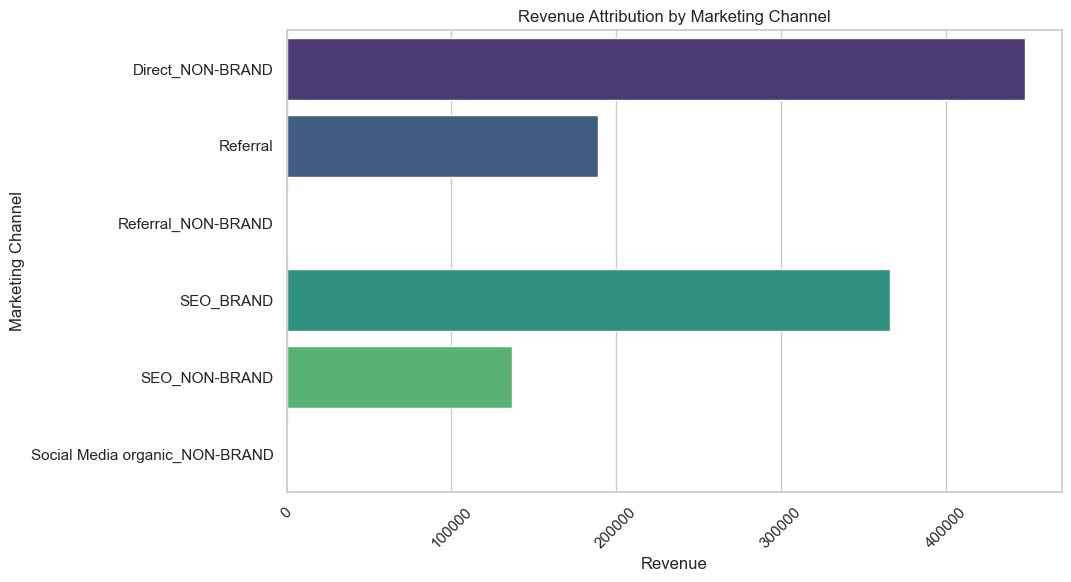

In [10]:
# Plotting function
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='REVENUE', y='MARKETINGCHANNEL', data=revenue_by_channel, palette='viridis')
plt.xlabel('Revenue')
plt.ylabel('Marketing Channel')
plt.title('Revenue Attribution by Marketing Channel')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Basic Data Overview: Checking for missing values and data types
data.info()

# Checking for unique values in each column
unique_values = {col: data[col].nunique() for col in data.columns}

# Basic statistics for the 'REVENUE' column
data['REVENUE'] = pd.to_numeric(data['REVENUE'], errors='coerce')
revenue_stats = data['REVENUE'].describe()

unique_values, revenue_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13304 entries, 0 to 13303
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CUSTOMERID            13304 non-null  object 
 1   SESSIONID             13174 non-null  object 
 2   TIMESTAMP_TOUCHPOINT  13159 non-null  object 
 3   MARKETINGCHANNEL      13159 non-null  object 
 4   REVENUE               1142 non-null   float64
dtypes: float64(1), object(4)
memory usage: 519.8+ KB


({'CUSTOMERID': 10001,
  'SESSIONID': 13160,
  'TIMESTAMP_TOUCHPOINT': 13130,
  'MARKETINGCHANNEL': 7,
  'REVENUE': 1},
 count    1142.0
 mean     1000.0
 std         0.0
 min      1000.0
 25%      1000.0
 50%      1000.0
 75%      1000.0
 max      1000.0
 Name: REVENUE, dtype: float64)

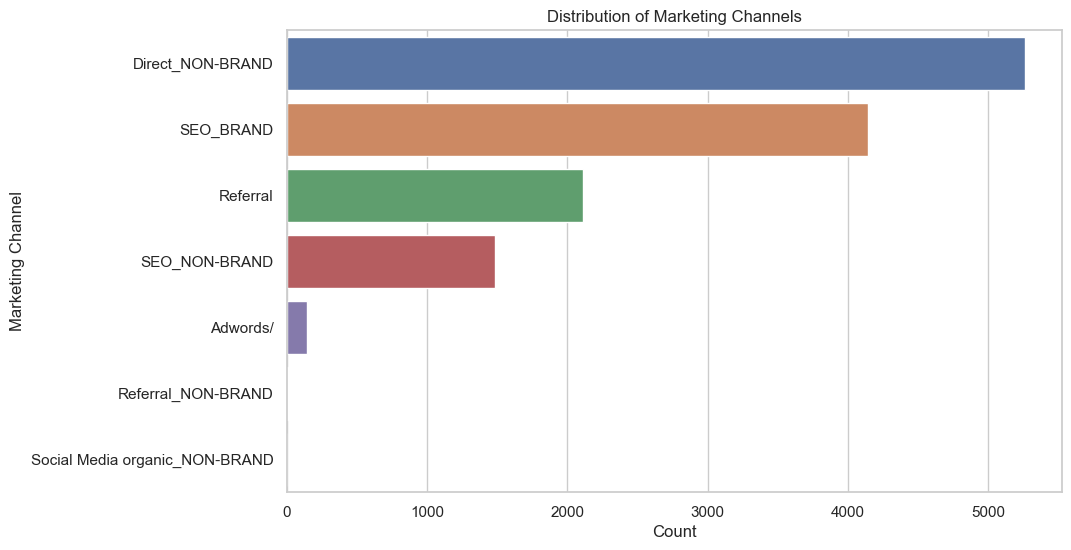

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the visual style
sns.set(style="whitegrid")

# Distribution of Marketing Channels
plt.figure(figsize=(10, 6))
sns.countplot(y='MARKETINGCHANNEL', data=data, order = data['MARKETINGCHANNEL'].value_counts().index)
plt.title('Distribution of Marketing Channels')
plt.xlabel('Count')
plt.ylabel('Marketing Channel')
plt.show()

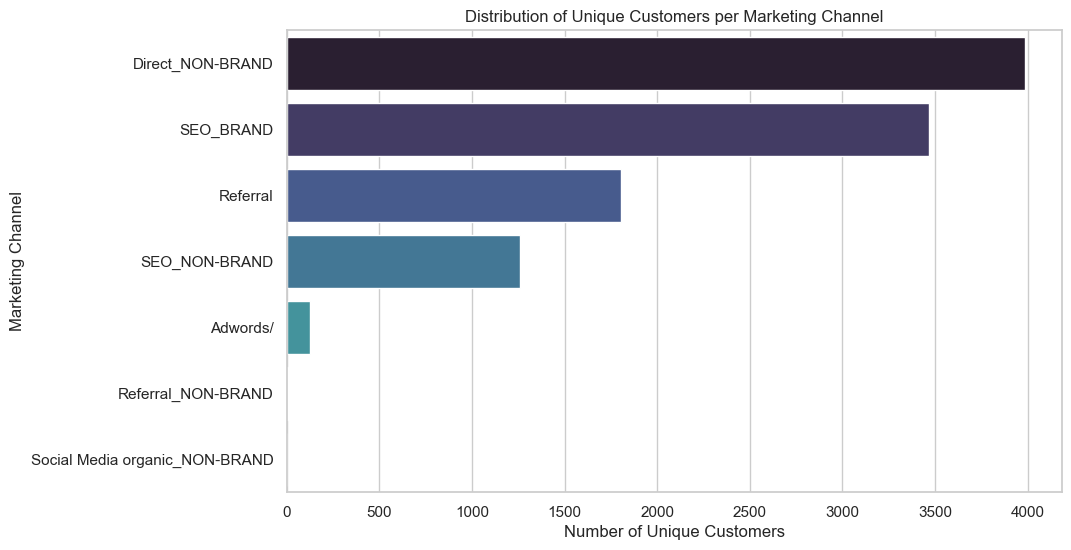

In [13]:
# Distribution of Customers per Marketing Channel
customer_dist_by_channel = data.groupby('MARKETINGCHANNEL')['CUSTOMERID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='CUSTOMERID', y='MARKETINGCHANNEL', data=customer_dist_by_channel, palette='mako')
plt.title('Distribution of Unique Customers per Marketing Channel')
plt.xlabel('Number of Unique Customers')
plt.ylabel('Marketing Channel')
plt.show()

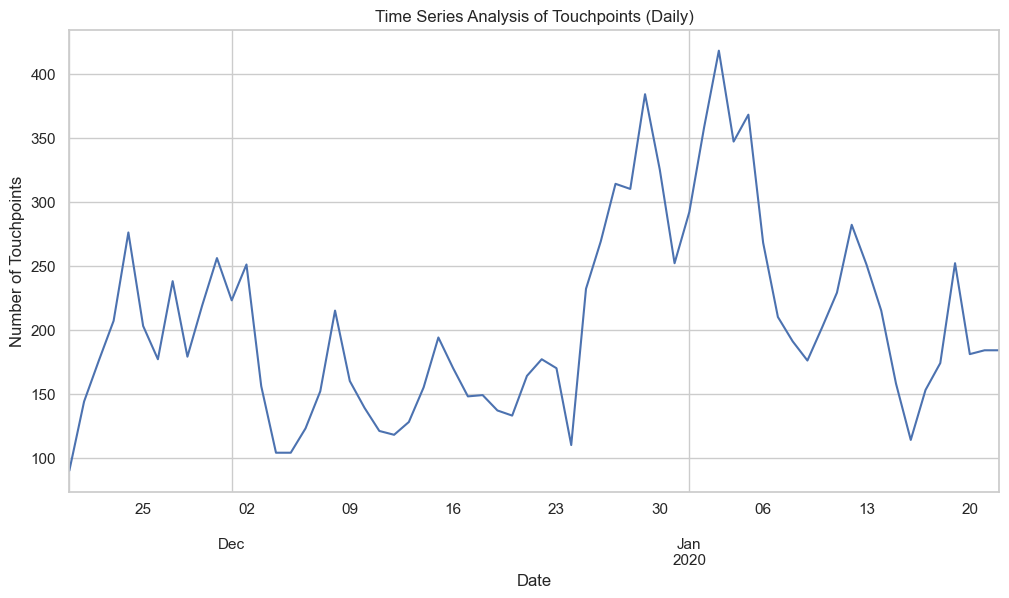

In [14]:
# Converting 'TIMESTAMP_TOUCHPOINT' to datetime for further analysis
data['TIMESTAMP_TOUCHPOINT'] = pd.to_datetime(data['TIMESTAMP_TOUCHPOINT'], errors='coerce')

# Time Series Analysis of Touchpoints
plt.figure(figsize=(12, 6))
data.set_index('TIMESTAMP_TOUCHPOINT').resample('D').size().plot()
plt.title('Time Series Analysis of Touchpoints (Daily)')
plt.xlabel('Date')
plt.ylabel('Number of Touchpoints')
plt.show()

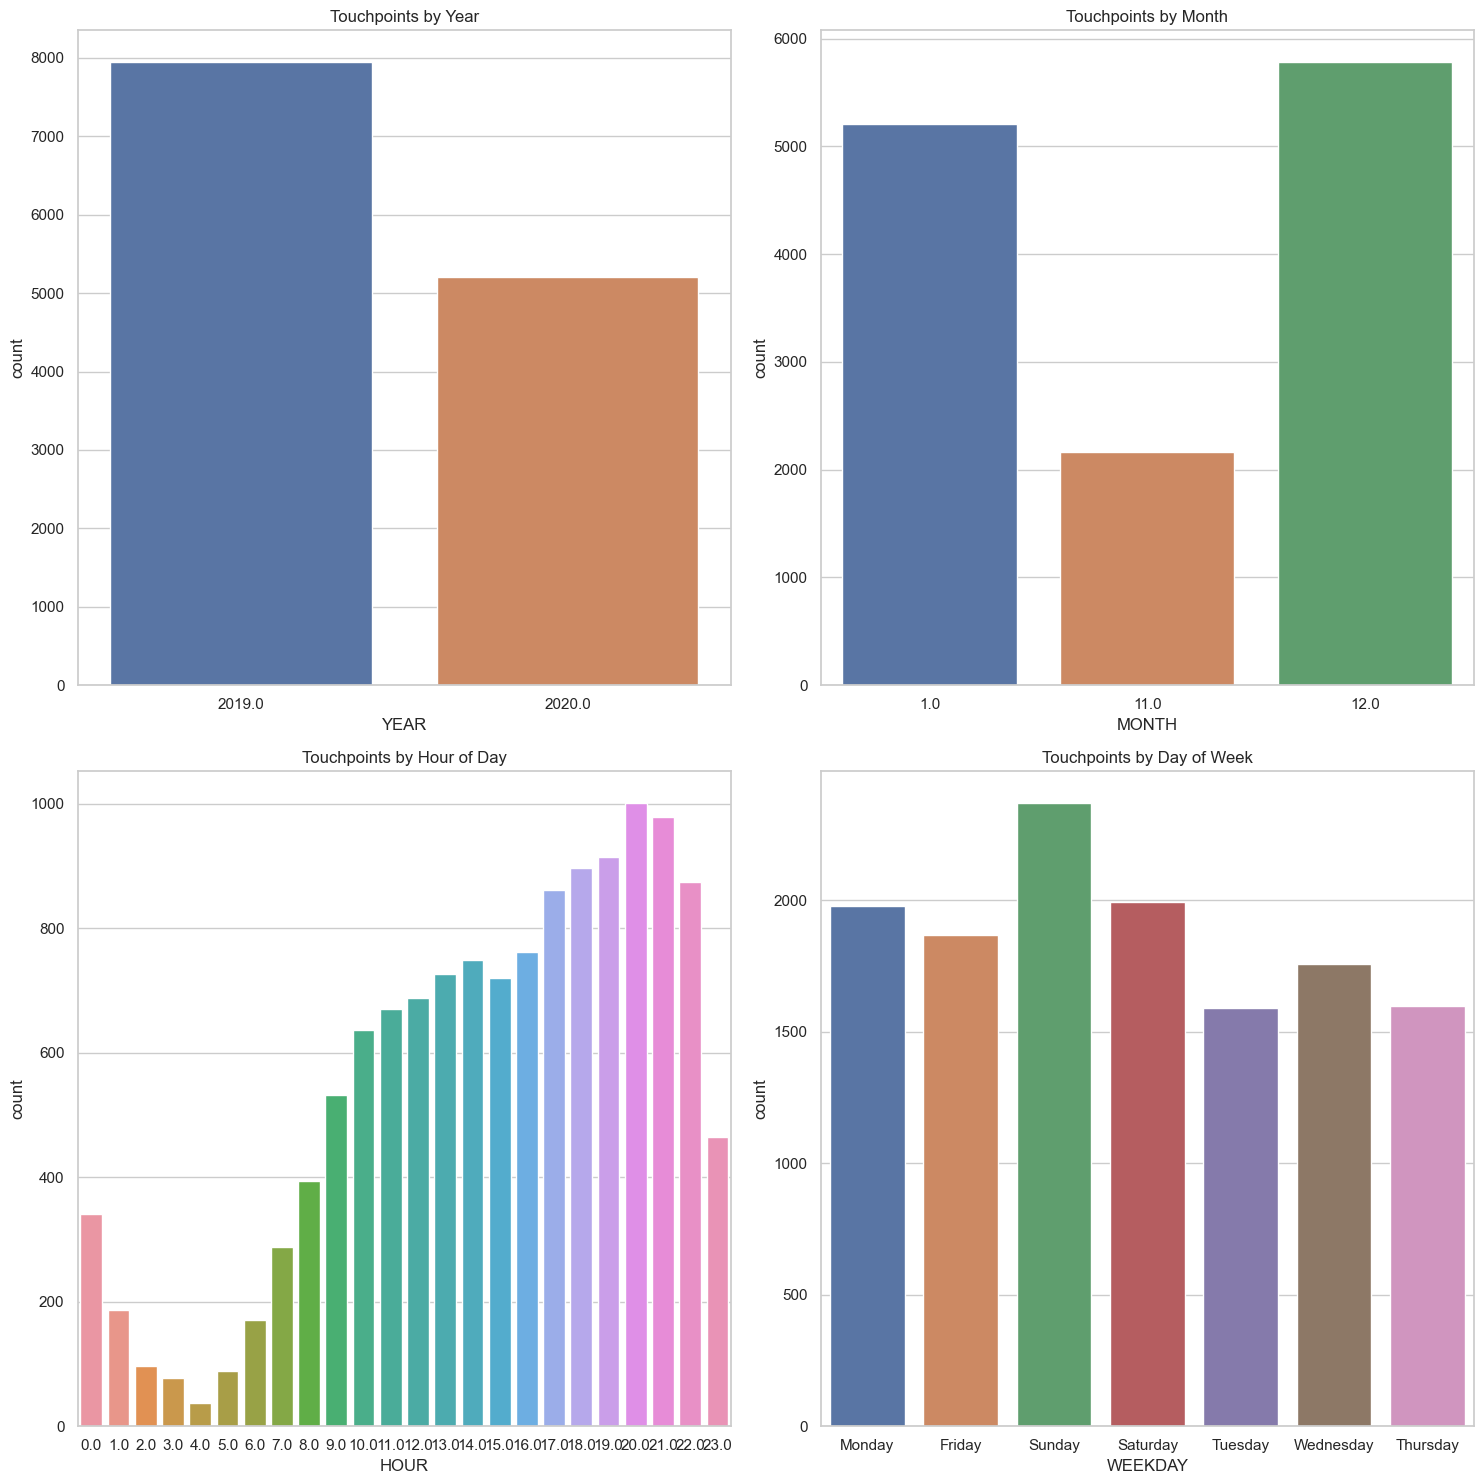

In [19]:
# Further Data Exploration Using All Columns

# Convert 'TIMESTAMP_TOUCHPOINT' to datetime
data['TIMESTAMP_TOUCHPOINT'] = pd.to_datetime(data['TIMESTAMP_TOUCHPOINT'], errors='coerce')

# Extracting date components from 'TIMESTAMP_TOUCHPOINT'
data['YEAR'] = data['TIMESTAMP_TOUCHPOINT'].dt.year
data['MONTH'] = data['TIMESTAMP_TOUCHPOINT'].dt.month
data['DAY'] = data['TIMESTAMP_TOUCHPOINT'].dt.day
data['HOUR'] = data['TIMESTAMP_TOUCHPOINT'].dt.hour
data['WEEKDAY'] = data['TIMESTAMP_TOUCHPOINT'].dt.day_name()

# Analyzing distribution of touchpoints over different time components
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.countplot(ax=axes[0, 0], x='YEAR', data=data)
axes[0, 0].set_title('Touchpoints by Year')
sns.countplot(ax=axes[0, 1], x='MONTH', data=data)
axes[0, 1].set_title('Touchpoints by Month')
sns.countplot(ax=axes[1, 0], x='HOUR', data=data)
axes[1, 0].set_title('Touchpoints by Hour of Day')
sns.countplot(ax=axes[1, 1], x='WEEKDAY', data=data)
axes[1, 1].set_title('Touchpoints by Day of Week')
plt.tight_layout()
plt.show()

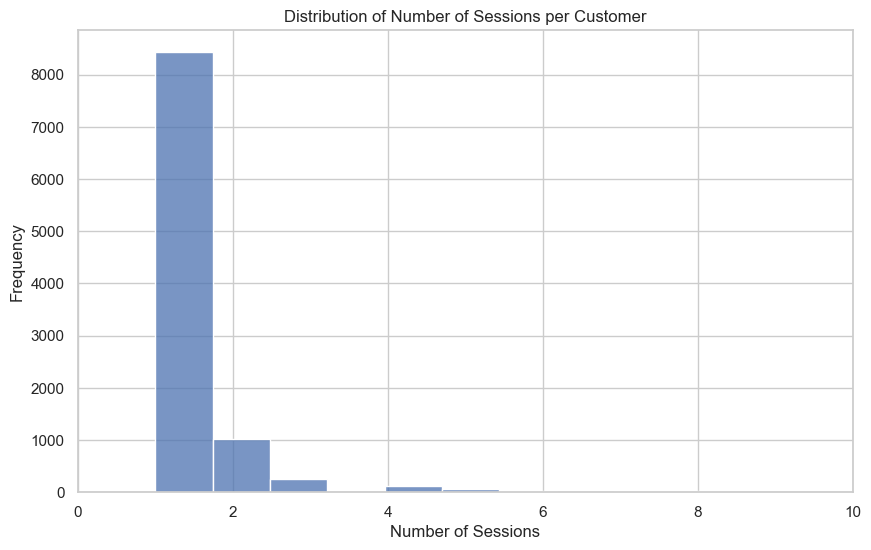

In [24]:
# Analyzing the number of sessions per customer
sessions_per_customer = data.groupby('CUSTOMERID')['SESSIONID'].nunique().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.histplot(sessions_per_customer, bins=50, kde=False)

# Set x-axis limits to show only values between 0 and 10
plt.xlim(0, 10)

# Set plot title and labels
plt.title('Distribution of Number of Sessions per Customer')
plt.xlabel('Number of Sessions')
plt.ylabel('Frequency')

# Show the plot
plt.show()